# CAP4453 Robot Vision: Two‑Layer Neural Network

This notebook provides a skeleton implementation of a two‑layer fully connected neural network using PyTorch. The network has one hidden layer with a ReLU non‑linearity followed by a linear output layer. You will load the CIFAR‑10 or MNIST dataset and compare the performance of this network to the linear classifier.


In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Choose device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Select dataset: 'cifar10' or 'mnist'
dataset_name = 'cifar10'

if dataset_name.lower() == 'cifar10':
    transform = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    num_classes = 10
    input_dim = 32*32*3
elif dataset_name.lower() == 'mnist':
    transform = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    num_classes = 10
    input_dim = 28*28
else:
    raise ValueError('Unknown dataset')

# Split train into train/val
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print(f"Train samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}, Test samples: {len(test_dataset)}")


Using device: cpu


/Users/bjethwani/Downloads/Cifar-10_Recognition/.venv/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


Train samples: 45000, Validation samples: 5000, Test samples: 10000


In [ ]:
# Define a two‑layer fully connected network with ReLU activation
import torch.nn as nn

class TwoLayerNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hyper‑parameters
hidden_dim = 256  # you can tune this
learning_rate = 1e-2
weight_decay = 1e-4
num_epochs = 20

# Initialize model, loss function and optimizer
model = TwoLayerNet(input_dim, hidden_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Track loss through time for graph
losses = []

# Training loop skeleton
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    train_loss = running_loss / total
    losses.append(train_loss)
    train_acc = 100. * correct / total

    # Evaluate on validation set
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()
    val_acc = 100. * val_correct / val_total
    print(f"Epoch {epoch+1}/{num_epochs}, Train loss: {train_loss:.4f}, Train acc: {train_acc:.2f}%, Val acc: {val_acc:.2f}%")


Epoch 1/20, Train loss: 2.1091, Train acc: 26.00%, Val acc: 30.34%
Epoch 2/20, Train loss: 1.9313, Train acc: 32.83%, Val acc: 32.50%
Epoch 3/20, Train loss: 1.8648, Train acc: 35.25%, Val acc: 36.18%
Epoch 4/20, Train loss: 1.8227, Train acc: 36.69%, Val acc: 37.18%
Epoch 5/20, Train loss: 1.7886, Train acc: 37.70%, Val acc: 38.34%
Epoch 6/20, Train loss: 1.7602, Train acc: 38.65%, Val acc: 38.44%
Epoch 7/20, Train loss: 1.7352, Train acc: 39.69%, Val acc: 39.64%
Epoch 8/20, Train loss: 1.7124, Train acc: 40.30%, Val acc: 40.92%
Epoch 9/20, Train loss: 1.6911, Train acc: 41.28%, Val acc: 40.98%
Epoch 10/20, Train loss: 1.6725, Train acc: 41.85%, Val acc: 42.48%
Epoch 11/20, Train loss: 1.6530, Train acc: 42.52%, Val acc: 42.94%
Epoch 12/20, Train loss: 1.6363, Train acc: 43.10%, Val acc: 42.80%
Epoch 13/20, Train loss: 1.6214, Train acc: 43.76%, Val acc: 42.66%
Epoch 14/20, Train loss: 1.6053, Train acc: 44.35%, Val acc: 43.44%
Epoch 15/20, Train loss: 1.5914, Train acc: 44.58%, Val a

In [5]:
model.eval()
correct = 0
total = 0


for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()

test_acc = 100 * correct / total
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 45.69


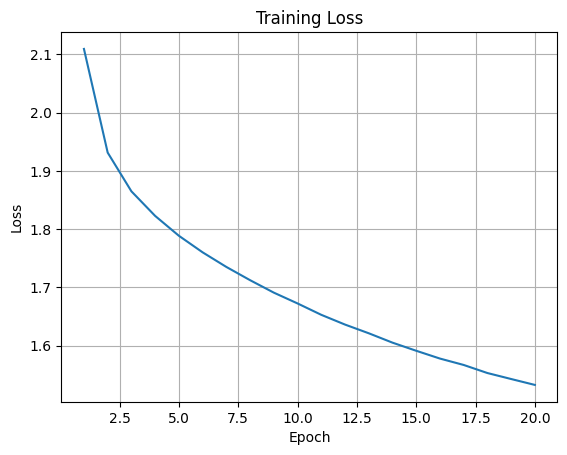

In [8]:
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.savefig('loss_curve_nn.pdf')
plt.show()

### Next steps

- Experiment with different hidden dimensions, learning rates and regularization strengths. Please record (e.g., screenshot, copy training/val log history etc) the validation set performances with different hyper‑parameters in the report. 
- After choosing hyper‑parameters, train on the combined train+validation set and report the test accuracy.
- Plot training and validation accuracies over epochs.
- Compare the performance of the two‑layer network with the linear classifier.
